In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [113]:
#import sales data from csv file 
salesData = pd.read_csv("large_sales_data.csv")

#import product data from csv file 
productData = pd.read_csv("large_product_details.csv")

In [114]:
#check the first 10 rows of sales data
salesData.head(10)

,TransactionID,ProductID,CustomerID,Quantity,SaleDate
0,1,104,1248,7,2020-01-01 00:00:00
1,2,103,1874,6,2020-01-01 00:00:00
2,3,105,1792,4,2020-01-01 00:00:00
3,4,108,1783,5,2020-01-01 00:00:00
4,5,106,1924,9,2020-01-01 00:00:00
5,6,110,1794,3,2020-01-01 00:00:00
6,7,142,1150,7,2020-01-01 00:00:00
7,8,112,1103,8,2020-01-01 00:00:00
8,9,131,1150,1,2020-01-01 00:00:00
9,10,111,1846,2,2020-01-01 00:00:00


In [115]:
#check the first 10 rows of the product data 
productData.head(10)

,ProductID,ProductName,Category,Price,Stock
0,101,Product_101,Clothing,242.23,90
1,102,Product_102,Accessories,421.42,80
2,103,Product_103,Books,226.54,64
3,104,Product_104,Accessories,150.05,301
4,105,Product_105,Accessories,432.49,21
5,106,Product_106,Electronics,468.71,437
6,107,Product_107,Accessories,217.68,458
7,108,Product_108,Clothing,25.45,444
8,109,Product_109,Accessories,369.55,360
9,110,Product_110,Groceries,493.78,377


In [116]:
#check the shape of both the dataframes 
print("Shape of sales data : " + str(salesData.shape) + "\nShape of product data  :" + str(productData.shape))

Shape of sales data : (1000000, 5)
Shape of product data  :(1000, 5)


In [117]:
#Check if any null data is there in any of the column in the sales data frame 
salesData.isnull().any()

TransactionID    False
ProductID        False
CustomerID       False
Quantity         False
SaleDate         False
dtype: bool

In [118]:
#Check if any null data is there in any of the column in the product data frame 
productData.isnull().any()

ProductID      False
ProductName    False
Category       False
Price          False
Stock          False
dtype: bool

In [119]:
#Check if any null data is there in any of the row in the sales data frame 
salesData.duplicated().any()

False

In [120]:
#Check if any null data is there in any of the row in the product data frame 
productData.duplicated().any()

False

In [121]:
#Merging both the sales data and product data to form a commercial data frame 
#by the product id 
commercialData = pd.merge(salesData, productData, on='ProductID')

#Checking first 10 rows of the commercial data frames 
commercialData.head(10)

,TransactionID,ProductID,CustomerID,Quantity,SaleDate,ProductName,Category,Price,Stock
0,1,104,1248,7,2020-01-01 00:00:00,Product_104,Accessories,150.05,301
1,2,103,1874,6,2020-01-01 00:00:00,Product_103,Books,226.54,64
2,3,105,1792,4,2020-01-01 00:00:00,Product_105,Accessories,432.49,21
3,4,108,1783,5,2020-01-01 00:00:00,Product_108,Clothing,25.45,444
4,5,106,1924,9,2020-01-01 00:00:00,Product_106,Electronics,468.71,437
5,6,110,1794,3,2020-01-01 00:00:00,Product_110,Groceries,493.78,377
6,7,142,1150,7,2020-01-01 00:00:00,Product_142,Accessories,48.73,479
7,8,112,1103,8,2020-01-01 00:00:00,Product_112,Electronics,154.22,179
8,9,131,1150,1,2020-01-01 00:00:00,Product_131,Books,157.36,90
9,10,111,1846,2,2020-01-01 00:00:00,Product_111,Groceries,140.77,228


In [122]:
#Create a new columns 'TotalSaleAmount' to store total price paid in the transaction
commercialData['TotalSaleAmount'] = commercialData.apply(lambda row : (row['Quantity'] * row['Price']), axis=1)

#View first 10 rows 
commercialData.head(10)

,TransactionID,ProductID,CustomerID,Quantity,SaleDate,ProductName,Category,Price,Stock,TotalSaleAmount
0,1,104,1248,7,2020-01-01 00:00:00,Product_104,Accessories,150.05,301,1050.35
1,2,103,1874,6,2020-01-01 00:00:00,Product_103,Books,226.54,64,1359.24
2,3,105,1792,4,2020-01-01 00:00:00,Product_105,Accessories,432.49,21,1729.96
3,4,108,1783,5,2020-01-01 00:00:00,Product_108,Clothing,25.45,444,127.25
4,5,106,1924,9,2020-01-01 00:00:00,Product_106,Electronics,468.71,437,4218.39
5,6,110,1794,3,2020-01-01 00:00:00,Product_110,Groceries,493.78,377,1481.34
6,7,142,1150,7,2020-01-01 00:00:00,Product_142,Accessories,48.73,479,341.11
7,8,112,1103,8,2020-01-01 00:00:00,Product_112,Electronics,154.22,179,1233.76
8,9,131,1150,1,2020-01-01 00:00:00,Product_131,Books,157.36,90,157.36
9,10,111,1846,2,2020-01-01 00:00:00,Product_111,Groceries,140.77,228,281.54


In [123]:
#Save the newly completed csv file 
commercialData.to_csv('complete_data.csv', index=False)

In [124]:
#Create a new column 'LowStock which check if the stock is low or not 
productData["LowStock"] = productData.apply(lambda row : (row['Stock'] <= 10), axis=1)
productData.head(10)

,ProductID,ProductName,Category,Price,Stock,LowStock
0,101,Product_101,Clothing,242.23,90,False
1,102,Product_102,Accessories,421.42,80,False
2,103,Product_103,Books,226.54,64,False
3,104,Product_104,Accessories,150.05,301,False
4,105,Product_105,Accessories,432.49,21,False
5,106,Product_106,Electronics,468.71,437,False
6,107,Product_107,Accessories,217.68,458,False
7,108,Product_108,Clothing,25.45,444,False
8,109,Product_109,Accessories,369.55,360,False
9,110,Product_110,Groceries,493.78,377,False


In [125]:
#Finf the aggregate quantity of each product category
total_quantity_by_category = commercialData.groupby('Category').agg({'Quantity':'sum'})

#Locate the location of category with maximum quantity
total_quantity_by_category.loc[total_quantity_by_category["Quantity"].idxmax()]

Quantity    1428834
Name: Books, dtype: int64

In [126]:
#Calculate the total amount generated by each category
total_sum_by_category = commercialData.groupby('Category').agg({'TotalSaleAmount':'sum'})
total_sum_by_category

,TotalSaleAmount
Category,
Accessories,2.839988e+08
Books,2.589533e+08
Clothing,2.185928e+08
Electronics,2.061045e+08
Groceries,1.948073e+08


In [127]:
#Finf the aggregate date of all the total quanitites by product
total_quantity_by_product = commercialData.groupby('ProductName').agg({'Quantity':'sum'})

#Locate the location of product with maximum quantity
total_quantity_by_product.loc[total_quantity_by_product["Quantity"].idxmax()]

Quantity    103469
Name: Product_124, dtype: int64

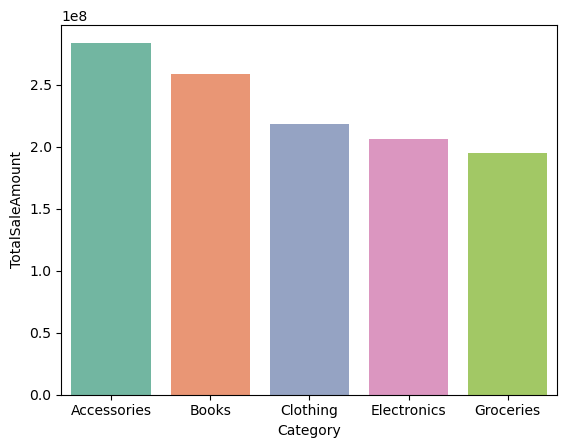

In [128]:
#Plot the bar graph representing the sale amount for each product category
sns.barplot(data=total_sum_by_category,x = 'Category', y = 'TotalSaleAmount', palette='Set2', hue='Category')
plt.show()